In [34]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

import xgboost
from xgboost import XGBRegressor

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

import matplotlib
import numpy as np
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ADMET = pd.read_excel("ADMET.xlsx")
MD = pd.read_excel("Molecular_Descriptor.xlsx")
MD

,SMILES,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,...,439.218115,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,...,467.249415,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,...,463.181729,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,...,467.249415,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,...,461.202465,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=...,0,1.8193,3.309852,177.6817,89.159790,24,24,73,43,...,598.166139,88.709996,2.063023,25.470481,21.946991,0.000000,7121,70,2.526,236
1970,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\...,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,...,570.134839,84.662088,2.064929,24.928962,21.405589,0.000000,6171,66,1.884,228
1971,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c...,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,...,570.134839,84.660642,2.064894,24.923083,21.400883,0.000000,6421,66,1.884,228
1972,Oc1ccc(cc1)C2=C([C@H]3O[C@H]2C[C@@H]3S(=O)(=O)...,0,1.3365,1.786232,125.5605,63.287860,18,18,51,31,...,436.098059,64.171346,2.070043,19.841924,16.326873,0.000000,2583,50,0.782,174


In [4]:
A = ADMET.iloc[:,1].values
D = ADMET.iloc[:,2].values
M = ADMET.iloc[:,3].values
E = ADMET.iloc[:,4].values
T = ADMET.iloc[:,5].values
print(np.mean(A), np.mean(D), np.mean(M), np.mean(E), np.mean(T))
X_un = MD.iloc[:,1:].values
X = preprocessing.scale(X_un)
print(X.shape)

0.3844984802431611 0.7401215805471124 0.5567375886524822 0.25785207700101315 0.7669706180344478
(1974, 729)


In [5]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1], [0,1],'k--')

In [38]:
#投票法
Y = T
# model = RandomForestClassifier(n_estimators=500) #0.910
model1 = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1)
model2 = RandomForestClassifier(n_estimators=500)
model3 = SVC(kernel='rbf')

X_,X__,Y_,Y__ = train_test_split(X,Y,train_size=0.9,test_size=0.1)
Loss = []
Score = []
P = []
R = []
kf=KFold(n_splits=10,shuffle=True)
for train_index,test_index in kf.split(X_):
    # print(train_index, test_index)
    train_X, train_y = X_[train_index,:], Y_[train_index]
    test_X, test_y = X_[test_index], Y_[test_index]
    X_resampled, Y_resampled = SMOTE().fit_resample(train_X, train_y)
    # X_resampled, Y_resampled = BorderlineSMOTE().fit_resample(train_X, train_y)
    model1.fit(X_resampled, Y_resampled)
    model2.fit(X_resampled, Y_resampled)
    model3.fit(X_resampled, Y_resampled)
    predit_y1 = model1.predict(test_X)
    predit_y2 = model2.predict(test_X)
    predit_y3 = model3.predict(test_X)
    loss = (log_loss(test_y,predit_y1) + log_loss(test_y,predit_y2) + log_loss(test_y,predit_y3))/3
    score = (accuracy_score(test_y,predit_y1) + accuracy_score(test_y,predit_y2) + accuracy_score(test_y,predit_y3))/3
    predit_y = [0] * len(predit_y1)
    for i in range(len(predit_y1)):
        if predit_y1[i] + predit_y2[i] + predit_y3[i] <= 1:
            predit_y[i] = 0
        else:
            predit_y[i] = 1

    p = precision_score(test_y, predit_y)
    r = recall_score(test_y, predit_y)
    Loss.append(loss)
    Score.append(score)
    P.append(p)
    R.append(r)
print(P)
print(R)
print(f'平均准确率为{np.mean(Score)}，平均对数损失为{np.mean(Loss)}')
print(f'平均精准度为{np.mean(P)}，平均召回率为{np.mean(R)}')
confusion_matrix(test_y, predit_y)

[0.9492753623188406, 0.9548872180451128, 0.9848484848484849, 1.0, 0.9428571428571428, 0.984251968503937, 0.9703703703703703, 0.9416058394160584, 0.9859154929577465, 0.9849624060150376]
[0.9632352941176471, 0.9694656488549618, 0.9558823529411765, 0.9640287769784173, 0.9777777777777777, 0.9541984732824428, 0.9424460431654677, 0.9626865671641791, 0.9459459459459459, 0.9632352941176471]
平均准确率为0.9344981908207959，平均对数损失为2.2623736440125723
平均精准度为0.9698974285332731，平均召回率为0.9598902174345663


array([[ 39,   2],
       [  5, 131]], dtype=int64)

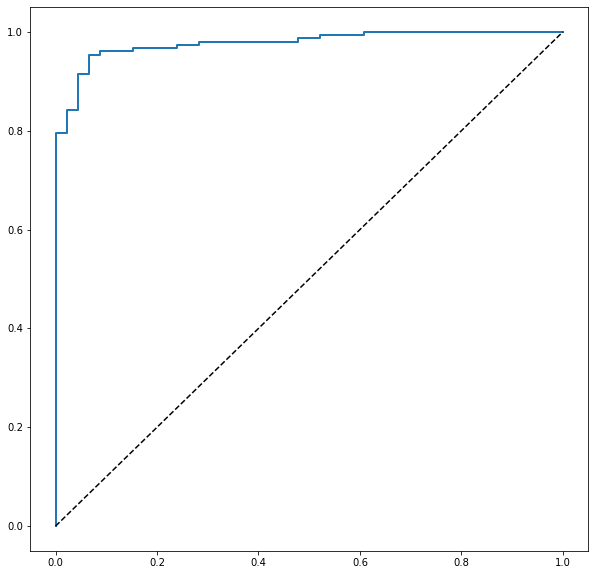

[0.9851851851851852, 0.96, 0.9548872180451128, 0.9848484848484849, 0.9923076923076923, 0.9689922480620154, 0.9577464788732394, 0.9774436090225563, 0.952755905511811, 0.9834710743801653]
[0.9366197183098591, 0.9375, 0.927007299270073, 0.9285714285714286, 0.9485294117647058, 0.9541984732824428, 0.9315068493150684, 0.9701492537313433, 0.9166666666666666, 0.875]
平均精准度为0.9717637896236264，平均召回率为0.9325749100911587
AUC为0.9776887871853547


array([[ 39,   2],
       [ 17, 119]], dtype=int64)

In [56]:
#单逻辑回归 ADMET
Y = T
plt.figure(figsize=(10, 10))
# model = RandomForestClassifier(n_estimators=500) #0.910
model_A = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1)
X_,X__,Y_,Y__ = train_test_split(X,Y,train_size=0.9,test_size=0.1)
Loss = []
Score = []
P = []
R = []
kf=KFold(n_splits=10,shuffle=True)
for train_index,test_index in kf.split(X_):
    # print(train_index, test_index)
    train_X, train_y = X_[train_index,:], Y_[train_index]
    test_X, test_y = X_[test_index], Y_[test_index]
    X_resampled, Y_resampled = SMOTE().fit_resample(train_X, train_y)
    #X_resampled, Y_resampled = RandomUnderSampler().fit_resample(train_X, train_y)
    model_A.fit(X_resampled, Y_resampled)
    predit_y = model_A.predict(test_X)
    loss = log_loss(test_y,predit_y)
    score = accuracy_score(test_y,predit_y)
    p = precision_score(test_y, predit_y)
    r = recall_score(test_y, predit_y)
    Loss.append(loss)
    Score.append(score)
    P.append(p)
    R.append(r)
y_scores = model_A.decision_function(X__)
# y_scores = cross_val_predict(model, X, Y, cv=5,method = "decision_funcion")
fpr, tpr, thresholds = roc_curve(Y__, y_scores)
auc = roc_auc_score(Y__, y_scores)
plot_roc_curve(fpr, tpr)
plt.savefig("T模型的ROC曲线.png")
plt.show()
print(P)
print(R)
# print(f'平均准确率为{np.mean(Score)}，平均对数损失为{np.mean(Loss)}')
print(f'平均精准度为{np.mean(P)}，平均召回率为{np.mean(R)}')
print(f'AUC为{auc}')
confusion_matrix(test_y, predit_y)

In [135]:
logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1)

svc = SVC(kernel='rbf')

rf = RandomForestClassifier(n_estimators=500)

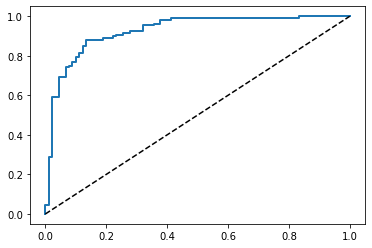

[4.462904800372146, 3.5025575892344727, 3.5025643463958542, 3.01610721180517, 3.989028238147921]
[0.8707865168539326, 0.8985915492957747, 0.8985915492957747, 0.9126760563380282, 0.8845070422535212]
平均准确率为0.8930305428074062，平均对数损失为3.694632437191113
精准度为0.9124779085856952，召回率为0.8950092183465295
AUC为0.9258230452674897


array([[141,  19],
       [ 22, 173]], dtype=int64)

In [136]:
#M样本均衡，直接使用逻辑回归，准确率
kf=KFold(n_splits=5,shuffle=True)

# model = RandomForestClassifier(n_estimators=500) #0.899
# model = SVC(kernel='rbf') #0.830

model_M = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1)
Y = M
X_,X__,Y_,Y__ = train_test_split(X,Y,train_size=0.9,test_size=0.1)
Loss = []
Score = []
P = []
R = []
kf=KFold(n_splits=5,shuffle=True)
for train_index,test_index in kf.split(X_):
    # print(train_index, test_index)
    train_X, train_y = X_[train_index,:], Y_[train_index]
    test_X, test_y = X_[test_index], Y_[test_index]
    X_resampled, Y_resampled = SMOTE().fit_resample(train_X, train_y)
    # X_resampled, Y_resampled = RandomUnderSampler().fit_resample(train_X, train_y)
    model_M.fit(X_resampled, Y_resampled)
    predit_y = model_M.predict(test_X)
    loss = log_loss(test_y,predit_y)
    score = accuracy_score(test_y,predit_y)
    p = precision_score(test_y, predit_y)
    r = recall_score(test_y, predit_y)
    Loss.append(loss)
    Score.append(score)
    P.append(p)
    R.append(r)

y_scores = model_M.decision_function(X__)
# y_scores = cross_val_predict(model, X, Y, cv=5,method = "decision_funcion")
fpr, tpr, thresholds = roc_curve(Y__, y_scores)
auc = roc_auc_score(Y__, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()
print(Loss)
print(Score)
print(f'平均准确率为{np.mean(Score)}，平均对数损失为{np.mean(Loss)}')
print(f'精准度为{np.mean(P)}，召回率为{np.mean(R)}')
print(f'AUC为{auc}')
confusion_matrix(test_y, predit_y)

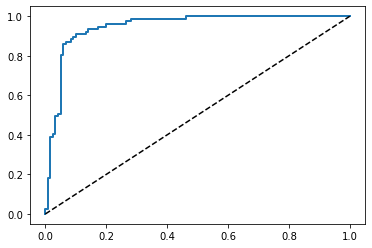

[2.7165599276029826, 3.298669644385577, 2.328483788334323, 3.880833266612904, 2.716573403964165, 3.2986965971079427, 3.3173197485475896, 3.51246311346155, 3.902745325789866, 2.9270736762161182]
[0.9213483146067416, 0.9044943820224719, 0.9325842696629213, 0.8876404494382022, 0.9213483146067416, 0.9044943820224719, 0.903954802259887, 0.8983050847457628, 0.8870056497175142, 0.9152542372881356]
平均准确率为0.9076429886370849，平均对数损失为3.1899418492023015
精准度为0.8658409904302822，召回率为0.9019419264622055
AUC为0.9477299559944188


array([[90, 13],
       [ 2, 72]], dtype=int64)

In [13]:
#对A来说，要先解决类别不均衡的问题
Y = A


# model = RandomForestClassifier(n_estimators=500) #0.910
model_A = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1)
X_,X__,Y_,Y__ = train_test_split(X,Y,train_size=0.9,test_size=0.1)
Loss = []
Score = []
P = []
R = []
kf=KFold(n_splits=10,shuffle=True)
for train_index,test_index in kf.split(X_):
    # print(train_index, test_index)
    train_X, train_y = X_[train_index,:], Y_[train_index]
    test_X, test_y = X_[test_index], Y_[test_index]
    X_resampled, Y_resampled = SMOTE().fit_resample(train_X, train_y)
    # X_resampled, Y_resampled = RandomUnderSampler().fit_resample(train_X, train_y)
    model_A.fit(X_resampled, Y_resampled)
    predit_y = model_A.predict(test_X)
    loss = log_loss(test_y,predit_y)
    score = accuracy_score(test_y,predit_y)
    p = precision_score(test_y, predit_y)
    r = recall_score(test_y, predit_y)
    Loss.append(loss)
    Score.append(score)
    P.append(p)
    R.append(r)

y_scores = model_A.decision_function(X__)
# y_scores = cross_val_predict(model, X, Y, cv=5,method = "decision_funcion")
fpr, tpr, thresholds = roc_curve(Y__, y_scores)
auc = roc_auc_score(Y__, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()
print(Loss)
print(Score)
print(f'平均准确率为{np.mean(Score)}，平均对数损失为{np.mean(Loss)}')
print(f'精准度为{np.mean(P)}，召回率为{np.mean(R)}')
print(f'AUC为{auc}')
confusion_matrix(test_y, predit_y)

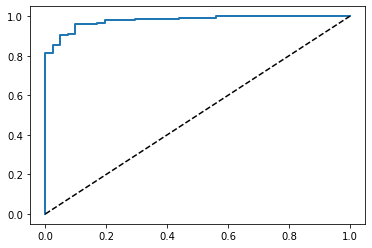

[2.2314535232161723, 1.8485699962966609, 2.3350316356616, 2.5296095342461937, 1.8485722486837883]
[0.9353932584269663, 0.9464788732394366, 0.9323943661971831, 0.9267605633802817, 0.9464788732394366]
平均准确率为0.9375011868966607，平均对数损失为2.158647387620883
精准度为0.9739135851944184，召回率为0.9399852841166034
AUC为0.9793382010253224


array([[ 96,   8],
       [ 11, 240]], dtype=int64)

In [138]:
#对A来说，要先解决类别不均衡的问题
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

Y = D
# model = RandomForestClassifier(n_estimators=1000) #0.938
model_D = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1)

X_,X__,Y_,Y__ = train_test_split(X,Y,train_size=0.9,test_size=0.1)
Loss = []
Score = []
P = []
R = []
kf=KFold(n_splits=5,shuffle=True)
for train_index,test_index in kf.split(X_):
    # print(train_index, test_index)
    train_X, train_y = X_[train_index,:], Y_[train_index]
    test_X, test_y = X_[test_index], Y_[test_index]
    X_resampled, Y_resampled = SMOTE().fit_resample(train_X, train_y)
    # X_resampled, Y_resampled = RandomUnderSampler().fit_resample(train_X, train_y)
    model_D.fit(X_resampled, Y_resampled)
    predit_y = model_D.predict(test_X)
    loss = log_loss(test_y,predit_y)
    score = accuracy_score(test_y,predit_y)
    p = precision_score(test_y, predit_y)
    r = recall_score(test_y, predit_y)
    Loss.append(loss)
    Score.append(score)
    P.append(p)
    R.append(r)

y_scores = model_D.decision_function(X__)
# y_scores = cross_val_predict(model, X, Y, cv=5,method = "decision_funcion")
fpr, tpr, thresholds = roc_curve(Y__, y_scores)
auc = roc_auc_score(Y__, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()
print(Loss)
print(Score)
print(f'平均准确率为{np.mean(Score)}，平均对数损失为{np.mean(Loss)}')
print(f'精准度为{np.mean(P)}，召回率为{np.mean(R)}')
print(f'AUC为{auc}')
confusion_matrix(test_y, predit_y)

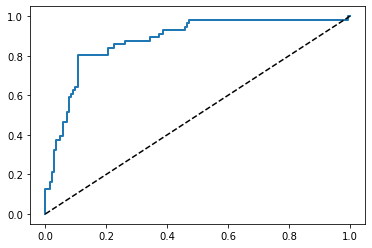

[5.045050454117896, 4.961980797910455, 5.8376365250257445, 5.643038354957006, 5.643036102569878]
[0.8539325842696629, 0.856338028169014, 0.8309859154929577, 0.8366197183098592, 0.8366197183098592]
平均准确率为0.8428991929102707，平均对数损失为5.426148446916196
精准度为0.6637061857375375，召回率为0.7665780561605996
AUC为0.8790241448692153


array([[246,  36],
       [ 22,  51]], dtype=int64)

In [139]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Y = E
# model = RandomForestClassifier(n_estimators=500) #0.869
model_E = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1)

X_,X__,Y_,Y__ = train_test_split(X,Y,train_size=0.9,test_size=0.1)
Loss = []
Score = []
P = []
R = []
kf=KFold(n_splits=5,shuffle=True)
for train_index,test_index in kf.split(X_):
    # print(train_index, test_index)
    train_X, train_y = X_[train_index,:], Y_[train_index]
    test_X, test_y = X_[test_index], Y_[test_index]
    X_resampled, Y_resampled = SMOTE().fit_resample(train_X, train_y)
    # X_resampled, Y_resampled = RandomUnderSampler().fit_resample(train_X, train_y)
    model_E.fit(X_resampled, Y_resampled)
    predit_y = model_E.predict(test_X)
    loss = log_loss(test_y,predit_y)
    score = accuracy_score(test_y,predit_y)
    p = precision_score(test_y, predit_y)
    r = recall_score(test_y, predit_y)
    Loss.append(loss)
    Score.append(score)
    P.append(p)
    R.append(r)

y_scores = model_E.decision_function(X__)
# y_scores = cross_val_predict(model, X, Y, cv=5,method = "decision_funcion")
fpr, tpr, thresholds = roc_curve(Y__, y_scores)
auc = roc_auc_score(Y__, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()
print(Loss)
print(Score)
print(f'平均准确率为{np.mean(Score)}，平均对数损失为{np.mean(Loss)}')
print(f'精准度为{np.mean(P)}，召回率为{np.mean(R)}')
print(f'AUC为{auc}')
confusion_matrix(test_y, predit_y)

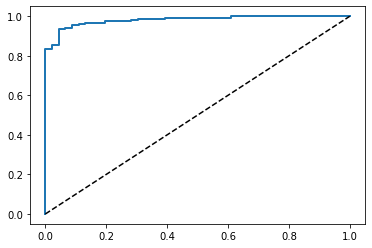

[2.7165464512417996, 1.5566840031291884, 2.1404537370770065, 3.210669343679873, 2.6269063668934365]
[0.9213483146067416, 0.9549295774647887, 0.9380281690140845, 0.9070422535211268, 0.923943661971831]
平均准确率为0.9290583953157145，平均对数损失为2.4502519804042606
精准度为0.9730222538766574，召回率为0.933016724760327
AUC为0.9812643020594967


array([[ 64,   6],
       [ 21, 264]], dtype=int64)

In [140]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Y = T
# model = RandomForestClassifier(n_estimators=500) #0.964
model_T = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1) #0.924

X_,X__,Y_,Y__ = train_test_split(X,Y,train_size=0.9,test_size=0.1)
Loss = []
Score = []
P = []
R = []
kf=KFold(n_splits=5,shuffle=True)
for train_index,test_index in kf.split(X_):
    # print(train_index, test_index)
    train_X, train_y = X_[train_index,:], Y_[train_index]
    test_X, test_y = X_[test_index], Y_[test_index]
    X_resampled, Y_resampled = SMOTE().fit_resample(train_X, train_y)
    # X_resampled, Y_resampled = RandomUnderSampler().fit_resample(train_X, train_y)
    model_T.fit(X_resampled, Y_resampled)
    predit_y = model_T.predict(test_X)
    loss = log_loss(test_y,predit_y)
    score = accuracy_score(test_y,predit_y)
    p = precision_score(test_y, predit_y)
    r = recall_score(test_y, predit_y)
    Loss.append(loss)
    Score.append(score)
    P.append(p)
    R.append(r)

y_scores = model_T.decision_function(X__)
# y_scores = cross_val_predict(model, X, Y, cv=5,method = "decision_funcion")
fpr, tpr, thresholds = roc_curve(Y__, y_scores)
auc = roc_auc_score(Y__, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()
print(Loss)
print(Score)
print(f'平均准确率为{np.mean(Score)}，平均对数损失为{np.mean(Loss)}')
print(f'精准度为{np.mean(P)}，召回率为{np.mean(R)}')
print(f'AUC为{auc}')
confusion_matrix(test_y, predit_y)

In [15]:
TEST = pd.read_excel("Molecular_Descriptor.xlsx", sheet_name=1)
TEST_ = TEST.iloc[:,1:]
TEST_.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,1.8193,3.309852,177.6817,89.159790,24,24,73,43,30,...,598.166139,88.708522,2.062989,25.464529,21.942236,0.0,7421,70,2.526,236
1,1,2.7289,7.446895,125.0445,60.543860,18,18,49,29,20,...,384.136159,59.883849,2.064960,10.441277,10.441277,0.0,2217,49,3.681,152
2,1,2.2303,4.974238,131.6880,64.439446,18,18,53,31,22,...,414.146724,63.762531,2.056856,13.254618,13.254618,0.0,2661,53,3.710,162
3,1,2.6387,6.962738,125.1723,60.434067,18,18,49,30,19,...,402.126737,61.734159,2.057805,12.992047,10.440839,0.0,2424,51,3.586,158
4,1,3.3834,11.447396,131.3467,62.532067,18,18,49,30,19,...,418.103894,61.734159,2.057805,12.992047,7.310754,0.0,2424,51,3.978,158


In [16]:
test = TEST_.values

X_total = np.r_[test ,X_un]
X_total_scaled = preprocessing.scale(X_total)
X_test = X_total_scaled[0:50]
X_train = X_total_scaled[50:]
print(X_test.shape)
print(X_train.shape)

(50, 729)
(1974, 729)


In [17]:
#ADEMT
model_a1 = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1) #0.924
model_a2 = RandomForestClassifier(n_estimators=500)
model_a3 = SVC(kernel='rbf')
model_d1 = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1) #0.924
model_d2 = RandomForestClassifier(n_estimators=500)
model_d3 = SVC(kernel='rbf')
model_e1 = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1) #0.924
model_e2 = RandomForestClassifier(n_estimators=500)
model_e3 = SVC(kernel='rbf')
model_m1 = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1) #0.924
model_m2 = RandomForestClassifier(n_estimators=500)
model_m3 = SVC(kernel='rbf')
model_t1 = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1) #0.924
model_t2 = RandomForestClassifier(n_estimators=500)
model_t3 = SVC(kernel='rbf')

In [18]:
model_a1.fit(X_train, A)
model_a2.fit(X_train, A)
model_a3.fit(X_train, A)
model_d1.fit(X_train, D)
model_d2.fit(X_train, D)
model_d3.fit(X_train, D)
model_e1.fit(X_train, E)
model_e2.fit(X_train, E)
model_e3.fit(X_train, E)
model_m1.fit(X_train, M)
model_m2.fit(X_train, M)
model_m3.fit(X_train, M)
model_t1.fit(X_train, T)
model_t2.fit(X_train, T)
model_t3.fit(X_train, T)

SVC()

In [19]:
pre_a1 = model_a1.predict(X_test)
pre_a2 = model_a2.predict(X_test)
pre_a3 = model_a3.predict(X_test)
pre_d1 = model_d1.predict(X_test)
pre_d2 = model_d2.predict(X_test)
pre_d3 = model_d3.predict(X_test)
pre_e1 = model_e1.predict(X_test)
pre_e2 = model_e2.predict(X_test)
pre_e3 = model_e3.predict(X_test)
pre_m1 = model_m1.predict(X_test)
pre_m2 = model_m2.predict(X_test)
pre_m3 = model_m3.predict(X_test)
pre_t1 = model_t1.predict(X_test)
pre_t2 = model_t2.predict(X_test)
pre_t3 = model_t3.predict(X_test)

In [20]:
pre_a = [0]*len(pre_a1)
for i in range(len(pre_a1)):
        if pre_a1[i] + pre_a2[i] + pre_a3[i] <= 1:
            pre_a[i] = 0
        else:
            pre_a[i] = 1
pre_d = [0]*len(pre_d1)
for i in range(len(pre_d1)):
        if pre_d1[i] + pre_d2[i] + pre_d3[i] <= 1:
            pre_d[i] = 0
        else:
            pre_d[i] = 1
pre_e = [0]*len(pre_e1)
for i in range(len(pre_e1)):
        if pre_e1[i] + pre_e2[i] + pre_e3[i] <= 1:
            pre_e[i] = 0
        else:
            pre_e[i] = 1
pre_m = [0]*len(pre_m1)
for i in range(len(pre_m1)):
        if pre_m1[i] + pre_m2[i] + pre_m3[i] <= 1:
            pre_m[i] = 0
        else:
            pre_m[i] = 1
pre_t = [0]*len(pre_t1)
for i in range(len(pre_t1)):
        if pre_t1[i] + pre_t2[i] + pre_t3[i] <= 1:
            pre_t[i] = 0
        else:
            pre_t[i] = 1

In [21]:
pre_a

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [23]:
with open("Q3_.txt", "w") as f:  # 打开文件
    for i in range(50):
        f.write(f'{pre_a[i]},{pre_d[i]},{pre_e[i]},{pre_m[i]},{pre_t[i]}')
        f.write('\r')

In [22]:
#验证一下
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, A)
rf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)